# Exercises: neural network review/introduction

Exercise on classification using NN. 

Author: Stefano Pagani <stefano.pagani@polimi.it>.

Date: 2024

Course: Mathematical and numerical foundations of scientific machine learning.

Example adapted from:
[1] Brunton, S. L., & Kutz, J. N. (2022).
Data-driven science and engineering: Machine learning,
dynamical systems, and control. Cambridge University Press.
Data from [1].


In [2]:

# Import modules

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from sklearn import linear_model
import tensorflow as tf
from tensorflow import keras

from keras import layers
from keras import regularizers
from keras.utils import to_categorical



2024-01-19 20:10:05.078773: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-19 20:10:05.135083: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 20:10:05.389269: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 20:10:05.389315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 20:10:05.444117: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
# Read dataset
rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [9, 6]

dogdata_mat = io.loadmat(os.path.join('dogData.mat'))
catdata_mat = io.loadmat(os.path.join('catData.mat'))

# Extract data from mat file 
dog = dogdata_mat['dog']
cat = catdata_mat['cat']

# Concatenate in 1D vector
CD = np.concatenate((dog,cat),axis=1)

# Split data into training and validation dataset
# Input data
X_train = np.concatenate((dog[:,:60],cat[:,:60]),axis=1) 
X_test = np.concatenate((dog[:,60:80],cat[:,60:80]),axis=1) 

# Labels
y_train = np.repeat(np.array([1,-1]),60)
y_test = np.repeat(np.array([1,-1]),20)




Task 1: visualize some pictures from the training set

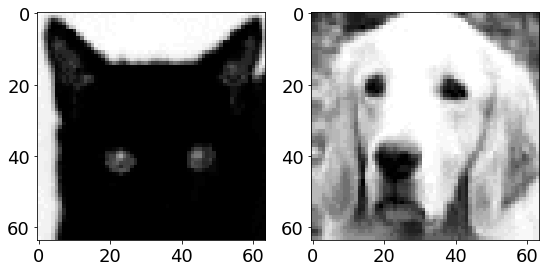

In [18]:
# Create figure subplot
plt.figure()
figplot1 = plt.subplot(1, 2,1)

figplot2 = plt.subplot(1,2,2)

# Select image
imgID = 33

# Show image
figplot1.imshow(np.reshape(cat[:, imgID], (64, 64)).T, cmap='gray')
figplot2.imshow(np.reshape(dog[:, imgID], (64, 64)).T, cmap='gray')
plt.show()




Task 2: we can formulate the problem as a least-squares problem of minimizing norm(X_trian x-y_train). Suggestion: use the Moore-Penrose Pseudoinverse.

In [8]:
## TEST LS (L2 NORM) WITHOUT REGULARIZATION

# Define A matrix solving the problem in LS sense
#linRegrObj = linear_model.LinearRegression.fit(X_train, y_train)
# Nope: use np pinv with X train and y_train

estimL2noReg = np.linalg.pinv(X_train.T) @ y_train # TO DO: check what pinv does in numpy doc

# IMPORTANT: the Least Squares problem here must be considered as "regression" used for classification 
# The input data matrix constitutes the model of the problem (regressors).
# A is the solution of the problem obtained by solving X^-1*y with an appropriate Linear Algebra method (e.g. pinv)
# Specifically, the data matrix contains one image of cats/dogs per column.

# Check the sign of the output on the X_test dataset
# EXPLANATION: The sign indicates whether the classification model considers each column (image) 
# as a cat or as a dog (either 1 or -1). The linear regression over the pixels basically determines 
# a "hyperline" which dimension equal to the number of pixels (the A estimator). The application of A
# to new data X_test evaluates ("classify") whether each new pixel column in X_test is near "dog" or "cat".
# The clear limitation: the model is linear and is not really capable of classifying complex image contents.
# Recall that this is infact what Lovera showed as introduction to ML during ELA 2022/2023 course.

validationOutputLabels = np.sign( estimL2noReg @ X_test ) 

# TO DO: check how 1 and -1 correspond to cat and dogs
truthValues = np.concatenate(np.ones(1, 20), -np.ones(1, 20), axis=1)
print(validationOutputLabels)



[ 1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1.  1.  1.  1.
 -1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
  1. -1. -1. -1.]



Task 3: we can formulate the problem as a least-squares problem plus a $\ell_1$ regularization (Lasso). Suggestion: use the command linear_model.Lasso(alpha=0.1).

In [9]:
## TEST LS (L2 NORM) USING LASSO REGULARIZATION
# TO DO: check what Lasso regularization does
alphaParam = 0
regressorL2Lasso = linear_model.Lasso(alphaParam) # TO DO: Chek what are the inputs to the model 
regressorL2Lasso.fit(X_train, y_train)

# Get estimator
estimL2Lasso = regressorL2Lasso
# Test linear classificator with Lasso on the test data matrix
test_labels_lasso = np.sign(estimL2Lasso @ X_test)

print(test_labels_lasso)



/home/peterc/.local/lib/python3.10/site-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)


ValueError: Found input variables with inconsistent numbers of samples: [4096, 120]


Task 3: implement a single layer (two neurons) neural network to classify the pictures.

In [ ]:

# Keras NN

from keras.models import Sequential   # importing Sequential model
from keras.layers import Dense        # importing Dense layers

X_tf_train = tf.constant(  np.transpose(X_train)/256, dtype = tf.float32 )
X_tf_test = tf.constant( np.transpose(X_test)/256, dtype = tf.float32 )

y = np.array([[1,0],[0,1]])

y_tf_train = tf.constant( np.repeat(y, [60, 60], axis=0) , dtype = tf.float32 )
y_tf_test = tf.constant( np.repeat(y, [20, 20], axis=0) , dtype = tf.float32 )


In [ ]:

# declaring model
basic_model = Sequential()

# Adding layers to the model
# basic_model.add(Dense(  ...   ))

#basic_model.compile(loss = ... )

# training the model
# basic_model.fit(  )

# Test, Loss and accuracy
loss_and_metrics = basic_model.evaluate(X_tf_test, y_tf_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])


In [ ]:


fig,axs = plt.subplots(4,1)
axs[0].bar(range(len(test_labels)),y_test)
NNpred = np.sign(np.array(-1.0 +2.0*basic_model(X_tf_test).numpy()))
#NNpred = (tf.argmax(basic_model(X_tf_test),axis=1).numpy())
axs[1].bar(range(len(test_labels)),NNpred[:,0])
axs[1].set_title('Single neuron')
axs[2].bar(range(len(test_labels)),test_labels)
axs[2].set_title('regression')
axs[3].bar(range(len(test_labels)),test_labels_lasso)
axs[3].set_title('lasso')
plt.show()
